In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [103]:
data = pd.read_csv("Fake_Real_Job_Posting.csv")
data.head()

,Unnamed: 0,title,location,requirements,employment_type,industry,function,fraudulent
0,0,Lead UX / UI Designer,"US, NY, Brookyn",4+ years of experience in UX / UI design prefe...,Full-time,Internet,Design,Real
1,1,Technical Manager,"GB, CAM, Huntingdon",Food Science/Technology Graduate or similar di...,Full-time,Food Production,Quality Assurance,Real
2,2,Quality Engineer,"US, OH, cincinnati",Job Duties and Responsibilities:AnalysisPerfor...,Full-time,Medical Devices,Engineering,Real
3,3,"International Broadcaster, Lao Service","US, DC, Washington",The International Broadcaster shall have at le...,Not Mentioned,Not Mentioned,Not Mentioned,Real
4,4,Distribution Specialist,"NL, NB, Eindhoven",Experience in professional logistic/warehouse ...,Full-time,Internet,Distribution,Real


In [104]:
data = data.replace('Not Mentioned','')   
data['requirements'] = data['requirements'].apply(lambda x: x.replace('&amp;',''))
data['requirements'] = data['requirements'].apply(lambda x: x.replace('&nbsp;',''))
data['requirements'] = data['requirements'].apply(lambda x: x.replace('&amp',''))
data['requirements'] = data['requirements'].apply(lambda x: x.replace('&nbsp',''))
data['requirements'] = data['requirements'].apply(lambda x: x.replace('JavaScript','Javascript'))
data.head()

,Unnamed: 0,title,location,requirements,employment_type,industry,function,fraudulent
0,0,Lead UX / UI Designer,"US, NY, Brookyn",4+ years of experience in UX / UI design prefe...,Full-time,Internet,Design,Real
1,1,Technical Manager,"GB, CAM, Huntingdon",Food Science/Technology Graduate or similar di...,Full-time,Food Production,Quality Assurance,Real
2,2,Quality Engineer,"US, OH, cincinnati",Job Duties and Responsibilities:AnalysisPerfor...,Full-time,Medical Devices,Engineering,Real
3,3,"International Broadcaster, Lao Service","US, DC, Washington",The International Broadcaster shall have at le...,,,,Real
4,4,Distribution Specialist,"NL, NB, Eindhoven",Experience in professional logistic/warehouse ...,Full-time,Internet,Distribution,Real


In [105]:
data.dtypes

Unnamed: 0          int64
title              object
location           object
requirements       object
employment_type    object
industry           object
function           object
fraudulent         object
dtype: object

In [106]:
#Our dataset has 17880 rows and 8 columns
data.shape

(17880, 8)

In [107]:
#Checking for null values
pd.isnull(data).sum() > 0

Unnamed: 0         False
title              False
location           False
requirements       False
employment_type    False
industry           False
function           False
fraudulent         False
dtype: bool

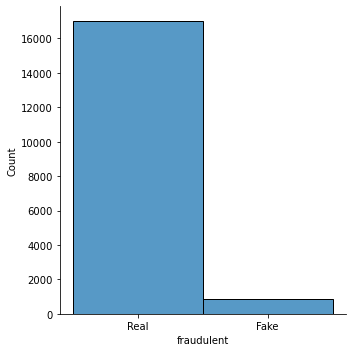

In [108]:
sns.displot(data['fraudulent'])

(array([1799., 6479., 1907., 1345., 2723.,  344.,  517.,  279.,  594.,
         411.,  709.,  401.,  164.,  129.,   79.]),
 array([ 0.        ,  2.46666667,  4.93333333,  7.4       ,  9.86666667,
        12.33333333, 14.8       , 17.26666667, 19.73333333, 22.2       ,
        24.66666667, 27.13333333, 29.6       , 32.06666667, 34.53333333,
        37.        ]),
 <BarContainer object of 15 artists>)

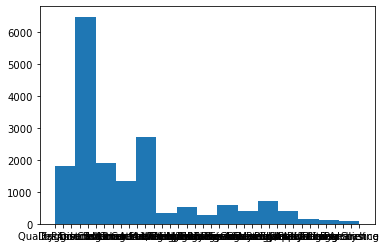

In [109]:
plt.hist(data.function,bins=15)

<AxesSubplot:>

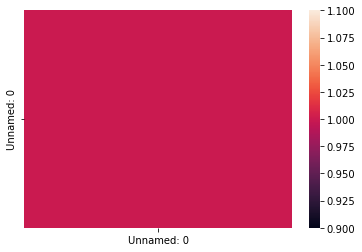

In [110]:
sns.heatmap(data.corr())

**Describe your dataset. How many rows are there?**
-17880 rows, 8 columns

**What are the names of some interesting columns?**
-fraudulent, requirements, employment_type

**Which data type are the columns?**
-int64, string

**What are a few predictions you would like to investigate?**
-Correlate job posting vs fraudulent information.

**What do your initial data visualizations tell you about your data?**
-The dataset has less than 1000 fraudulent job postings. No correlation, we need to give a numerical value to the different features and analyze the data again.

**What inconsistencies do you notice in your data?** 
-We are going to find that.

**What are other columns (“features”) you would like to add to your data?**
-We are going to embed the words first to be analyze after that we are going to talk if we need to add more features.

In [111]:
data['fraudulent'].value_counts()

Real    17014
Fake      866
Name: fraudulent, dtype: int64

In [112]:
# reminder 1 = real; 0 = false
data['fraudulent'] = data['fraudulent'].apply(lambda x: 1 if x=='Real' else 0)
data['fraudulent'].value_counts()

1    17014
0      866
Name: fraudulent, dtype: int64

In [113]:
# data['fraudulent'] = data['fraudulent'].apply(lambda x: 1 if x=='Real' else 0)
data['fraudulent'].unique()

array([1, 0])

In [114]:
data.shape

(17880, 8)

In [115]:
fake_set = data.loc[data['fraudulent'] == 0]
real_set = data.loc[data['fraudulent'] == 1]

count    17880.000000
mean         3.761913
std          2.074126
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         19.000000
Name: title, dtype: float64


<AxesSubplot:>

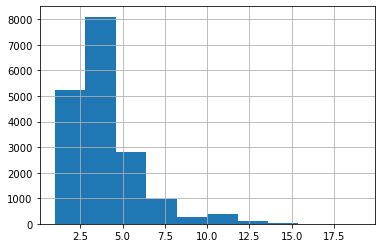

In [116]:
# determines length of title
# does title length reflect fraudulent status?

lens = data.title.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist()

count    866.000000
mean       4.016166
std        2.310512
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       15.000000
Name: title, dtype: float64


<AxesSubplot:>

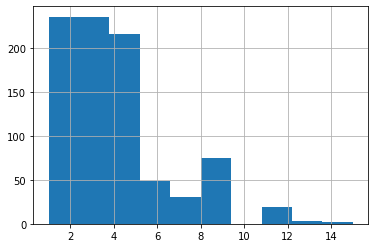

In [117]:
# determines length of title in fraudulent set
# does title length reflect fraudulent status?

lens = fake_set.title.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist()

count    17014.000000
mean         3.748971
std          2.060606
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         19.000000
Name: title, dtype: float64


<AxesSubplot:>

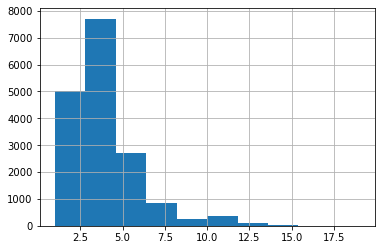

In [118]:
# determines length of title in legitimate set
# does title length reflect fraudulent status?

lens = real_set.title.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist()

count    17880.000000
mean        77.864765
std         81.515325
min          0.000000
25%         19.000000
50%         62.000000
75%        108.000000
max       1645.000000
Name: requirements, dtype: float64


<AxesSubplot:>

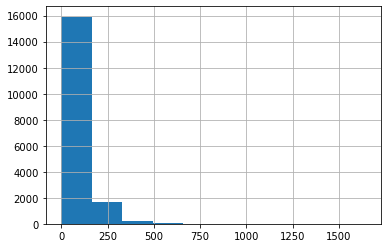

In [119]:
# determines length of requirements
# does requirements length reflect fraudulent status?

lens = data.requirements.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist()

count    866.000000
mean      58.125866
std       73.155873
min        0.000000
25%        7.000000
50%       34.000000
75%       84.000000
max      471.000000
Name: requirements, dtype: float64


<AxesSubplot:>

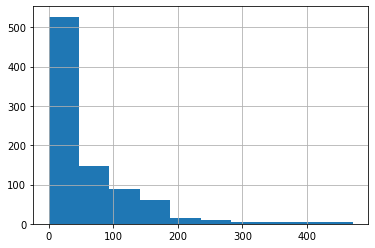

In [120]:
# determines length of requirements in fraudulent set
# does requirements length reflect fraudulent status?

lens = fake_set.requirements.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist()

count    17014.000000
mean        78.869460
std         81.792637
min          0.000000
25%         20.000000
50%         63.000000
75%        108.000000
max       1645.000000
Name: requirements, dtype: float64


<AxesSubplot:>

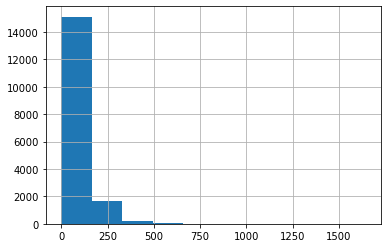

In [121]:
# determines length of requirements
# does requirements length reflect fraudulent status?

lens = real_set.requirements.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist()

In [122]:
# fakes = data[data['fraudulent'] == 0]
# fakes.requirements.value_counts().to_dict()

In [123]:
reals = data[data['fraudulent'] == 1].sample(866, ignore_index=True)
fakes = data[data['fraudulent'] == 0]
dataset = pd.concat([reals, fakes], ignore_index=True)
dataset.shape

(1732, 8)

In [124]:
dataset['title'] = dataset['title'].str.lower()
dataset['requirements'] = dataset['requirements'].str.lower()
dataset['industry'] = dataset['industry'].str.lower()
dataset['function'] = dataset['function'].str.lower()
print(dataset)

      Unnamed: 0                                        title  \
0           4697                       implementation manager   
1          12899                              fall internship   
2            378                        senior java developer   
3          17530                              sales executive   
4          10813                             mobile developer   
...          ...                                          ...   
1727       17771                       rooms division manager   
1728       17811                             process engineer   
1729       17814                           appointment setter   
1730       17827                  senior engineer shawnee, ks   
1731       17853  hiring part time workers for cash position.   

                  location                                       requirements  \
0           US, IN, Cayuga  requirement: minimum high school diploma, desi...   
1       US, DC, Washington  extensive research experience

In [125]:
dataset['input'] = ''

In [126]:
dataset['input'] = dataset.apply(lambda row: row['title'] + ' ' + row['requirements'] + ' ' + row['industry'] + ' ' + row['function'], axis=1)
dataset

,Unnamed: 0,title,location,requirements,employment_type,industry,function,fraudulent,input
0,4697,implementation manager,"US, IN, Cayuga","requirement: minimum high school diploma, desi...",,,,1,implementation manager requirement: minimum hi...
1,12899,fall internship,"US, DC, Washington",extensive research experienceexcellent written...,Temporary,writing and editing,research,1,fall internship extensive research experiencee...
2,378,senior java developer,"NL, , The Hague",your skills:university degree in it with minim...,Full-time,computer software,information technology,1,senior java developer your skills:university d...
3,17530,sales executive,"US, PA, Philadelphia","new business development• prospect, qualify an...",Full-time,information technology and services,consulting,1,sales executive new business development• pros...
4,10813,mobile developer,"JP, 13, Tokyo","deep android and/or ios sdk experiencejava, c,...",Full-time,internet,engineering,1,mobile developer deep android and/or ios sdk e...
...,...,...,...,...,...,...,...,...,...
1727,17771,rooms division manager,"MY, ,",high school or equivalent education required. ...,,,,0,rooms division manager high school or equivale...
1728,17811,process engineer,"US, CA, Bakersfield",b.s. in chemical engineering required with 3 t...,Full-time,oil & energy,engineering,0,process engineer b.s. in chemical engineering ...
1729,17814,appointment setter,"US, IL, Chicago",must have computer abilitymust have a great at...,Contract,automotive,customer service,0,appointment setter must have computer abilitym...
1730,17827,"senior engineer shawnee, ks","US, KS, Shawnee",requirements:education required: bachelor’s de...,,,,0,"senior engineer shawnee, ks requirements:educa..."


In [127]:
stop_words = set(stopwords.words('english'))
 
dataset['input'] = dataset['input'].apply(lambda words: word_tokenize(words))

dataset

,Unnamed: 0,title,location,requirements,employment_type,industry,function,fraudulent,input
0,4697,implementation manager,"US, IN, Cayuga","requirement: minimum high school diploma, desi...",,,,1,"[implementation, manager, requirement, :, mini..."
1,12899,fall internship,"US, DC, Washington",extensive research experienceexcellent written...,Temporary,writing and editing,research,1,"[fall, internship, extensive, research, experi..."
2,378,senior java developer,"NL, , The Hague",your skills:university degree in it with minim...,Full-time,computer software,information technology,1,"[senior, java, developer, your, skills, :, uni..."
3,17530,sales executive,"US, PA, Philadelphia","new business development• prospect, qualify an...",Full-time,information technology and services,consulting,1,"[sales, executive, new, business, development•..."
4,10813,mobile developer,"JP, 13, Tokyo","deep android and/or ios sdk experiencejava, c,...",Full-time,internet,engineering,1,"[mobile, developer, deep, android, and/or, ios..."
...,...,...,...,...,...,...,...,...,...
1727,17771,rooms division manager,"MY, ,",high school or equivalent education required. ...,,,,0,"[rooms, division, manager, high, school, or, e..."
1728,17811,process engineer,"US, CA, Bakersfield",b.s. in chemical engineering required with 3 t...,Full-time,oil & energy,engineering,0,"[process, engineer, b.s, ., in, chemical, engi..."
1729,17814,appointment setter,"US, IL, Chicago",must have computer abilitymust have a great at...,Contract,automotive,customer service,0,"[appointment, setter, must, have, computer, ab..."
1730,17827,"senior engineer shawnee, ks","US, KS, Shawnee",requirements:education required: bachelor’s de...,,,,0,"[senior, engineer, shawnee, ,, ks, requirement..."


In [129]:
dataset['input'] = dataset['input'].apply(lambda word_tokens: [w for w in word_tokens if not w.lower() in stop_words])
dataset

,Unnamed: 0,title,location,requirements,employment_type,industry,function,fraudulent,input
0,4697,implementation manager,"US, IN, Cayuga","requirement: minimum high school diploma, desi...",,,,1,"[implementation, manager, requirement, :, mini..."
1,12899,fall internship,"US, DC, Washington",extensive research experienceexcellent written...,Temporary,writing and editing,research,1,"[fall, internship, extensive, research, experi..."
2,378,senior java developer,"NL, , The Hague",your skills:university degree in it with minim...,Full-time,computer software,information technology,1,"[senior, java, developer, skills, :, universit..."
3,17530,sales executive,"US, PA, Philadelphia","new business development• prospect, qualify an...",Full-time,information technology and services,consulting,1,"[sales, executive, new, business, development•..."
4,10813,mobile developer,"JP, 13, Tokyo","deep android and/or ios sdk experiencejava, c,...",Full-time,internet,engineering,1,"[mobile, developer, deep, android, and/or, ios..."
...,...,...,...,...,...,...,...,...,...
1727,17771,rooms division manager,"MY, ,",high school or equivalent education required. ...,,,,0,"[rooms, division, manager, high, school, equiv..."
1728,17811,process engineer,"US, CA, Bakersfield",b.s. in chemical engineering required with 3 t...,Full-time,oil & energy,engineering,0,"[process, engineer, b.s, ., chemical, engineer..."
1729,17814,appointment setter,"US, IL, Chicago",must have computer abilitymust have a great at...,Contract,automotive,customer service,0,"[appointment, setter, must, computer, abilitym..."
1730,17827,"senior engineer shawnee, ks","US, KS, Shawnee",requirements:education required: bachelor’s de...,,,,0,"[senior, engineer, shawnee, ,, ks, requirement..."


In [130]:
dataset['input'] = dataset['input'].apply(lambda word_tokens: " ".join(word_tokens))
dataset['input']

0       implementation manager requirement : minimum h...
1       fall internship extensive research experiencee...
2       senior java developer skills : university degr...
3       sales executive new business development• pros...
4       mobile developer deep android and/or ios sdk e...
                              ...                        
1727    rooms division manager high school equivalent ...
1728    process engineer b.s . chemical engineering re...
1729    appointment setter must computer abilitymust g...
1730    senior engineer shawnee , ks requirements : ed...
1731    hiring part time workers cash position . exper...
Name: input, Length: 1732, dtype: object

In [131]:
input_fake_set = dataset.loc[dataset['fraudulent'] == 0]
input_real_set = dataset.loc[dataset['fraudulent'] == 1]

In [132]:
# most common words in dataset
from sklearn.feature_extraction.text import CountVectorizer

co = CountVectorizer(stop_words=stop_words)
counts = co.fit_transform(dataset.input)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names_out()).T.sort_values(0,ascending=False).head(50)

,0
experience,2131
skills,1224
work,1004
ability,866
years,695
knowledge,630
customer,568
must,560
required,557
management,549


In [133]:
# most common words in fake set
co = CountVectorizer(stop_words=stop_words)
counts = co.fit_transform(input_fake_set.input)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names_out()).T.sort_values(0,ascending=False).head(50)

,0
experience,954
skills,644
work,506
ability,434
engineering,315
years,310
must,305
required,281
knowledge,279
service,272


In [134]:
#most common words in real set
co = CountVectorizer(stop_words=stop_words)
counts = co.fit_transform(input_real_set.input)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names_out()).T.sort_values(0,ascending=False).head(50)

,0
experience,1177
skills,580
work,498
ability,432
years,385
sales,365
knowledge,351
management,311
customer,299
required,276


In [135]:
# most common bi-grams in dataset
co = CountVectorizer(ngram_range=(2,2),stop_words=stop_words)
counts = co.fit_transform(dataset.input)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names_out()).T.sort_values(0,ascending=False).head(50)

,0
customer service,391
communication skills,261
years experience,255
information technology,247
ability work,165
data entry,153
school diploma,143
technology services,131
high school,129
skills ability,129


In [136]:
#most common bi-grams in fake set
co = CountVectorizer(ngram_range=(2,2),stop_words=stop_words)
counts = co.fit_transform(input_fake_set.input)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names_out()).T.sort_values(0,ascending=False).head(50)

,0
customer service,198
data entry,149
communication skills,110
oil energy,109
ability work,104
years experience,102
high school,83
skills ability,81
school diploma,72
information technology,69


In [137]:
#most common bi-grams in legitimate set
co = CountVectorizer(ngram_range=(2,2),stop_words=stop_words)
counts = co.fit_transform(input_real_set.input)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names_out()).T.sort_values(0,ascending=False).head(50)

,0
customer service,193
information technology,178
years experience,153
communication skills,151
technology services,99
fast paced,77
school diploma,71
computer software,63
experience working,63
health care,62


In [138]:
# compares words in dataset to words in an English word list

from tqdm import tqdm
#words = pd.read_table('https://raw.githubusercontent.com/dwyl/english-words/master/words_alpha.txt')
words = pd.read_table("words_alpha.txt", delimiter=": ", engine='python')
words.columns=['word']
words = words['word'].str.lower().values.tolist()

# how should we handlesplitting words not seperated by a space
dataset['clean_text'] = dataset.input.apply(lambda x: ' '.join([i for i in x.split(' ')]))
#dataset['clean_text'] = dataset.clean_text.str.lower().str.replace('[^a-zA]', ' ')

# commented out for the moment because it takes about 5 mins to execute
"""
non_list = {}
for sent in tqdm(dataset.clean_text.str.split().values):
    for token in sent:
        if token not in words:
            non_list[token] = 1 if token not in non_list else non_list[token]+1
            
pd.Series(non_list).sort_values(ascending=False).head(30)
"""

'\nnon_list = {}\nfor sent in tqdm(dataset.clean_text.str.split().values):\n    for token in sent:\n        if token not in words:\n            non_list[token] = 1 if token not in non_list else non_list[token]+1\n            \npd.Series(non_list).sort_values(ascending=False).head(30)\n'

In [139]:
# topic modeling
from sklearn.decomposition import LatentDirichletAllocation, NMF
vectorizer = CountVectorizer(stop_words=stop_words)
model = vectorizer.fit(dataset.clean_text)
docs = vectorizer.transform(dataset.clean_text)
lda = LatentDirichletAllocation(20)
lda.fit(docs)
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([(feature_names[i])
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
print_top_words(lda,vectorizer.get_feature_names_out(),10)

Topic #0: experience knowledge work skills ability technical engineering good strong understanding
Topic #1: experience service customer skills services work years related minimum management
Topic #2: experience mso work years skills engineering manufacturing must required engineer
Topic #3: experience required education degree management church administrative teaching english university
Topic #4: experience web software development technology information knowledge developer javascript design
Topic #5: experience ability skills work sales must environment working required job
Topic #6: experience internet access computer information skills data good years design
Topic #7: skills sales ability communication work experience written excellent environment customer
Topic #8: responsible food ms skills beverage accountant programs excel brand computer
Topic #9: ability equipment website computer customer systems service skills plant demonstrated
Topic #10: patient reports bw duties office cl

<AxesSubplot:>

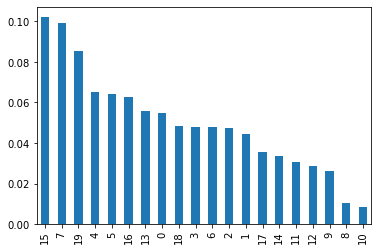

In [140]:
# how often each topic appears
dataset['topic']=lda.transform(docs).argmax(axis=1)
dataset.topic.value_counts(normalize=True).plot.bar()

In [141]:
# samples of topic
dataset[dataset.topic==16].input.sample(5).values

array(['hr process leader selected candidate must demonstrate following competencies : • organization : must able marshal resources , organize multiple resources accomplish goal . uses resources effective efficiently arranges information organized manner.• business acumen : depth knowledge businesses work particularly areas human resources . aware future policies , practices trends human resource business processes information technology . knows strategies complex industries work . • conflict management : steps conflict see ’ opportunity . reads situation ’ quickly good focused listening.• organizational agility : knowledgeable organizations work . knows get things done formally informally . understands philosophies behind key policies organization understands culture organizations.• strategic agility : sees ahead clearly anticipate future consequences trends accurately broad knowledge perspective.• political saavy : negotiate complex political situations effectively quietly sensitive 

In [142]:
input_fake_set = dataset.loc[dataset['fraudulent'] == 0]
input_real_set = dataset.loc[dataset['fraudulent'] == 1]

In [143]:
# topic modeling - fake set

from sklearn.decomposition import LatentDirichletAllocation, NMF
vectorizer = CountVectorizer(stop_words=stop_words)
model_fake = vectorizer.fit(input_fake_set.clean_text)
docs = vectorizer.transform(input_fake_set.clean_text)
lda = LatentDirichletAllocation(20)
lda.fit(docs)
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([(feature_names[i])
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
print_top_words(lda,vectorizer.get_feature_names_out(),10)

Topic #0: health care hospital admin work entry data clerical administrative home
Topic #1: ability data skills computer typist follow entry home basic available
Topic #2: skills experience customer service computer test knowledge software communication years
Topic #3: engineering oil knowledge understanding qualifications skills experience good energy personal
Topic #4: administrative assistant accounting excel word skills office excellent proficient must
Topic #5: work marketing office advertising job able internet home get done
Topic #6: time experience part required development cash work full exchange knowledge
Topic #7: experience skills sales ability management years development environment work engineering
Topic #8: technology information experience services preferred research programming development developer engineer
Topic #9: skills management experience culinary team years excellent development food executive
Topic #10: data skills entry high ability experience school commun

/tmp/ipykernel_31/348261457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_fake_set['topic']=lda.transform(docs).argmax(axis=1)


<AxesSubplot:>

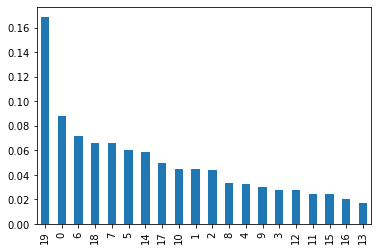

In [144]:
# how often each topic appears in fake set
# I'm not sure how to resolve the "SettingWithCopyWarning"

input_fake_set['topic']=lda.transform(docs).argmax(axis=1)
input_fake_set.topic.value_counts(normalize=True).plot.bar()

In [145]:
# samples of topic in fake set
input_fake_set[input_fake_set.topic==5].input.sample(5).values

array(['casual job/immediate start - experience necessary - training provided',
       'entry level online data entry/typist home office suppliescomputer internet accessquiet work area away distractionsmust able work independently get job done little guidance . administrative',
       'network marketing ambition succeed , desire best field discourage people turn . qualities perfect business marketing advertising advertising',
       'virtual administrative clerk home office suppliescomputer internet accessquiet work area away distractionsmust able work independently get job done little guidance . administrative',
       'network marketing ambition succeed , desire best field discourage people turn . qualities perfect business marketing advertising advertising'],
      dtype=object)

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC
from sklearn.svm import LinearSVC


In [147]:
train, test = train_test_split(dataset, test_size=0.2)
# val, test = train_test_split(test, test_size=0.5)

print('train shape', train.shape)
print('test shape', test.shape)
print()

# Pipeline: tfidf followed by the model
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                     ('clf-svm', SVC(random_state=42)),
])

# training the model
text_clf_svm.fit(train.input.tolist(), train.fraudulent.tolist())

# testing the model
predicted_svm = text_clf_svm.predict(test.input.tolist())
y_pred = predicted_svm # predicted output of the test set 
y_test = test.fraudulent.tolist() # correct results for the test set
print(np.mean(y_pred == y_test))
# predicted_svm = text_clf_svm.predict(val.input.tolist())
# print(np.mean(predicted_svm == val.fraudulent.tolist()))

train shape (1385, 11)
test shape (347, 11)

0.8357348703170029


In [148]:
test['fraudulent'].value_counts()

1    178
0    169
Name: fraudulent, dtype: int64

In [149]:
# fakes.requirements.value_counts().to_dict()

In [150]:
example = 'Experience and Skills \xa0Required- Minimum of 3 years of sales experience- Ability to work in a home office environment- Exceptional speaking, writing, and negotiation skills- You must be a motivated self starter and instil that others- College degree'
text_clf_svm.predict([example])

array([0])

In [151]:
from sklearn import metrics

y_pred = predicted_svm
y_test = test.fraudulent.tolist()
print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))
print("F1: ",round(metrics.f1_score(y_test, y_pred),3))

Accuracy:  0.836
F1:  0.839


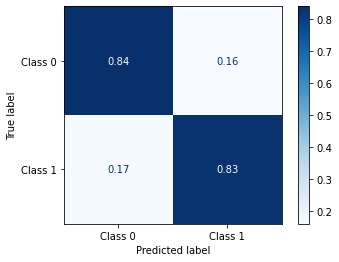

In [152]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[0, 1], normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)

plt.show()
# disp.ax_.set_title('Logistic Regression Confusion matrix, with normalization');

In [153]:
# # The SHAP values

# import shap

# svm = text_clf_svm
# X_test = test.input.tolist()
# y_test = test.fraudulent.tolist()

# svm_explainer = shap.KernelExplainer(svm.predict,X_test)
# svm_shap_values = svm_explainer.shap_values(X_test)

In [154]:
from sklearn.linear_model import LogisticRegression

# cv = CountVectorizer()#analyzer=text_prep, binary=True)#, min_df=10, max_df=0.95)
# cv.fit_transform()
# train_feature_set=cv.transform(x_train)
# test_feature_set=cv.transform(x_test)


# Pipeline: tfidf followed by the model
text_clf_lr = Pipeline([('vect', CountVectorizer()),
                     ('clf-svm', LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=1000)),
])

# training the model
text_clf_lr.fit(train.input.tolist(), train.fraudulent.tolist())

# testing the model
predicted_lr = text_clf_lr.predict(test.input.tolist())
print(np.mean(predicted_lr == test.fraudulent.tolist()))

0.8270893371757925


In [155]:
from sklearn import metrics

y_pred = predicted_lr
y_test = test.fraudulent.tolist()
print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))
print("F1: ",round(metrics.f1_score(y_test, y_pred),3))

Accuracy:  0.827
F1:  0.829


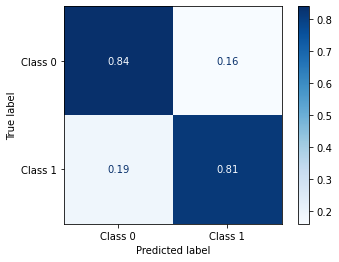

In [156]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[0, 1], normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)

plt.show()
# disp.ax_.set_title('Logistic Regression Confusion matrix, with normalization');

In [157]:
incorrectly_predicted_texts = []

for index, row in fakes.iterrows():
    prediction = text_clf_svm.predict([row['requirements']])
    prediction = prediction[0]
    print(row['requirements'])
    print('predicted label:', prediction, 'real label:', row['fraudulent'])
    print()
    print()

Must be able to work from home
predicted label: 0 real label: 0


Qualifications  personal attributes• Higher technical education, MSc / BSc or other relevant experience, preferably within structural or architectural disciplines.• Technical knowledge within the oil industry, preferably 4-7 years’ of relevant experience• Knowledge in PDMS is a great advantage• Good knowledge of standards and regulations• Fluent oral and written English• Good communication skills• Must be able to work both independently and in teamsWe offer• Friendly colleagues in an industry with a bright future.• An environment where you are encouraged to develop your skills and share your knowledge with your colleagues.• Competitive benefits and strong focus on work-life balance.
predicted label: 1 real label: 0


Qualifications  personal attributes• Relevant QC inspection experience - Essential• HNC or equivalent in Mechanical Engineering - Desirable• Trade qualification in Mechanical Engineering - Desireable
predict

In [158]:
for index, row in reals.iterrows():
    prediction = text_clf_svm.predict([row['requirements']])
    prediction = prediction[0]
    print(row['requirements'])
    print('predicted label:', prediction, 'real label:', row['fraudulent'])
    print()
    print()

Requirement: Minimum High School Diploma, Desired 2 year college or better
predicted label: 1 real label: 1


Extensive research experienceExcellent written and oral communications skillsDemonstrated interest in writing and communicationsAuthorized to work and accept new employment in the United States
predicted label: 1 real label: 1


Your skills:University Degree in IT with minimum 8 years of professional experience in JAVA and 6 years in J2EE;Minimum 5 years of experience using Spring Framework;Minimum 1 year of experience using ESB products like Apache camel, Mule ESB, spring integration, Websphere ESB, Fuse Service works or similar;1 year of experience in multi developer projects using collaboration tools like code repository, work item management and continuous integration tools;Knowledge of Maven, SQL, Linux operating system, preferably Red Hat Enterprise Linux and JBoss enterprise application platform;Knowledge of development project management methodologies or continuous inte

In [160]:
# preparing the ols pipeline with a CountVectorizer and LogisticRegression
lr_pipeline = Pipeline([('vect', CountVectorizer()),
                     ('ols-logistic-regression', LogisticRegression()),
])
# training the model
lr_pipeline.fit(train.input.tolist(), train.fraudulent.tolist())
# testing/predicting the model on a test set
y_pred = lr_pipeline.predict(test.input.tolist())
print("Accuracy: ", round(metrics.accuracy_score(test.fraudulent.tolist(), y_pred), 3))

Accuracy:  0.824


In [161]:
# Fake example

text_clf_svm.predict(["Data Entry / Typist Work At Home	US, TX, Houston	Must be able to work from home	Full-time	Consumer Services	Customer Service"])

array([0])

In [162]:
# Fake example
# Change "Data Entry / Typist Work At Home	US, TX, Houston Must be able to work from home" to "Engineer / Therapist Full Time	US, NY, New York Remote options available" change the prediction from fake to real
text_clf_svm.predict(["Data Entry / Typist Work At Home	US, TX, Houston	Must be able to work from home	Full-time	Consumer Services	Customer Service"])

array([0])

In [163]:
# Change Label Example
# Change "Data Entry / Typist Work At Home	US, TX, Houston Must be able to work from home"
# to "Engineer / Therapist Full Time	US, NY, New York Remote options available" 
# to change the prediction from fake to real
text_clf_svm.predict(["Engineer / Therapist Full Time	US, NY, New York Remote options available	Full-time Engineer Engineer"])

array([1])